## Bank Marketing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix,
plot_confusion_matrix,
classification_report,
balanced_accuracy_score,
precision_score, precision_recall_curve,
f1_score,
fbeta_score,
recall_score,
roc_curve, roc_auc_score)
import joblib

In [2]:
df = pd.read_csv('Bank_Modelling.csv')

df

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,55-64,Not Previously Contacted,0
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,35-44,Not Previously Contacted,0
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,25-34,Not Previously Contacted,0
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,35-44,Not Previously Contacted,0
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,25-34,Not Previously Contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,45-54,Not Previously Contacted,1
43189,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,65+,Not Previously Contacted,1
43190,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,65+,144 to 282 days,1
43191,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,55-64,Not Previously Contacted,0


## Standardization

In [3]:
df_std = df.copy()

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df_std[['balance', 'day', 'duration', 'campaign','previous']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
df_std[['balance', 'day', 'duration', 'campaign','previous']] = scaler.transform(df_std[['balance', 'day', 'duration', 'campaign', 'previous']])

df_std

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,management,married,tertiary,no,0.259354,yes,no,cellular,-1.301418,may,0.010368,-0.573827,-0.250730,55-64,Not Previously Contacted,0
1,technician,single,secondary,no,-0.435568,yes,no,cellular,-1.301418,may,-0.415726,-0.573827,-0.250730,35-44,Not Previously Contacted,0
2,entrepreneur,married,secondary,no,-0.444443,yes,yes,cellular,-1.301418,may,-0.706245,-0.573827,-0.250730,25-34,Not Previously Contacted,0
3,management,married,tertiary,no,-0.369166,yes,no,cellular,-1.301418,may,-0.462209,-0.573827,-0.250730,35-44,Not Previously Contacted,0
4,management,single,tertiary,no,-0.298161,yes,yes,cellular,-1.301418,may,-0.160070,-0.573827,-0.250730,25-34,Not Previously Contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,-0.173904,no,no,cellular,0.143343,nov,2.783852,0.078925,-0.250730,45-54,Not Previously Contacted,1
43189,retired,divorced,primary,no,0.123262,no,no,cellular,0.143343,nov,0.765716,-0.247451,-0.250730,65+,Not Previously Contacted,1
43190,retired,married,secondary,no,1.433555,no,no,cellular,0.143343,nov,3.364890,0.731677,1.035364,65+,144 to 282 days,1
43191,blue-collar,married,secondary,no,-0.225513,no,no,telephone,0.143343,nov,0.967143,0.405301,-0.250730,55-64,Not Previously Contacted,0


## Label Encoding

In [7]:
df_encode = df_std.copy()

In [8]:
# label encode

labelencoder_X = LabelEncoder()

In [9]:
df_encode['job']      = labelencoder_X.fit_transform(df_encode['job']) 
df_encode['marital']  = labelencoder_X.fit_transform(df_encode['marital']) 
df_encode['default']  = labelencoder_X.fit_transform(df_encode['default']) 
df_encode['housing']  = labelencoder_X.fit_transform(df_encode['housing']) 
df_encode['pdays_group']     = labelencoder_X.fit_transform(df_encode['pdays_group']) 
df_encode['loan']     = labelencoder_X.fit_transform(df_encode['loan']) 
df_encode['contact']  = labelencoder_X.fit_transform(df_encode['contact'])

In [10]:
labelOE_ed = OrdinalEncoder(categories=[['primary','secondary','tertiary']])
labelOE_mo = OrdinalEncoder(categories=[['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', \
                                         'sep', 'oct', 'nov', 'dec']])
labelOE_age = OrdinalEncoder(categories=[['17-24','25-34','35-44', '45-54', '55-64', '65+' ]])

In [11]:
df_encode['education'] = labelOE_ed.fit_transform(df_encode[['education']])
df_encode['month'] = labelOE_mo.fit_transform(df_encode[['month']])
df_encode['age_group'] = labelOE_age.fit_transform(df_encode[['age_group']])

In [12]:
df_encode

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,4,1,2.0,0,0.259354,1,0,0,-1.301418,4.0,0.010368,-0.573827,-0.250730,4.0,4,0
1,9,2,1.0,0,-0.435568,1,0,0,-1.301418,4.0,-0.415726,-0.573827,-0.250730,2.0,4,0
2,2,1,1.0,0,-0.444443,1,1,0,-1.301418,4.0,-0.706245,-0.573827,-0.250730,1.0,4,0
3,4,1,2.0,0,-0.369166,1,0,0,-1.301418,4.0,-0.462209,-0.573827,-0.250730,2.0,4,0
4,4,2,2.0,0,-0.298161,1,1,0,-1.301418,4.0,-0.160070,-0.573827,-0.250730,1.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,9,1,2.0,0,-0.173904,0,0,0,0.143343,10.0,2.783852,0.078925,-0.250730,3.0,4,1
43189,5,0,0.0,0,0.123262,0,0,0,0.143343,10.0,0.765716,-0.247451,-0.250730,5.0,4,1
43190,5,1,1.0,0,1.433555,0,0,0,0.143343,10.0,3.364890,0.731677,1.035364,5.0,1,1
43191,1,1,1.0,0,-0.225513,0,0,1,0.143343,10.0,0.967143,0.405301,-0.250730,4.0,4,0


In [13]:
# Turn the ordinal encoded value into integer.

df_encode['education'] = df_encode['education'].apply(lambda x : int(x))
df_encode['month'] = df_encode['month'].apply(lambda x : int(x))
df_encode['age_group'] = df_encode['age_group'].apply(lambda x : int(x))

In [14]:
df_encode

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,4,1,2,0,0.259354,1,0,0,-1.301418,4,0.010368,-0.573827,-0.250730,4,4,0
1,9,2,1,0,-0.435568,1,0,0,-1.301418,4,-0.415726,-0.573827,-0.250730,2,4,0
2,2,1,1,0,-0.444443,1,1,0,-1.301418,4,-0.706245,-0.573827,-0.250730,1,4,0
3,4,1,2,0,-0.369166,1,0,0,-1.301418,4,-0.462209,-0.573827,-0.250730,2,4,0
4,4,2,2,0,-0.298161,1,1,0,-1.301418,4,-0.160070,-0.573827,-0.250730,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,9,1,2,0,-0.173904,0,0,0,0.143343,10,2.783852,0.078925,-0.250730,3,4,1
43189,5,0,0,0,0.123262,0,0,0,0.143343,10,0.765716,-0.247451,-0.250730,5,4,1
43190,5,1,1,0,1.433555,0,0,0,0.143343,10,3.364890,0.731677,1.035364,5,1,1
43191,1,1,1,0,-0.225513,0,0,1,0.143343,10,0.967143,0.405301,-0.250730,4,4,0


## Machine Learning Modelling , Predicting for Deposit Features.

### Splitting Dataset

In [15]:
data = df_encode.copy()

In [16]:
x = data.drop(columns='Deposit')

y = data['Deposit']

In [17]:
xtrain,xtest,ytrain,ytest =  train_test_split(x, y, train_size=.8, random_state=2)

In [18]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(34554, 8639, 34554, 8639)

In [19]:
model_ori_logis = LogisticRegression(solver='liblinear')
model_ori_logis.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model_ori_tree = tree.DecisionTreeClassifier(max_depth=3)
model_ori_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
model_ori_rf = RandomForestClassifier()
model_ori_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
#### Model Comparison with Cross validation

nilai_Logistik = np.mean(cross_val_score(model_ori_logis, xtest, ytest, cv=5, scoring='accuracy')) * 100 
nilai_Tree = np.mean(cross_val_score(model_ori_tree, xtest, ytest, cv=5, scoring='accuracy')) * 100 
nilai_RandFor = np.mean(cross_val_score(model_ori_rf, xtest, ytest, cv=5, scoring='accuracy')) * 100 
print(
    f'Logistic Regression score: {nilai_Logistik}%\nDecision Tree score: {nilai_Tree}%\nRandomForestClassifier score: {nilai_RandFor}%'
)

Logistic Regression score: 89.8715793819297%
Decision Tree score: 89.48958132278196%
RandomForestClassifier score: 89.99890089858242%


## Evaluation Metrics Before Tuning

#### Logistic Regression

In [23]:
y_pred_log_ori = model_ori_logis.predict(xtest)

In [24]:
confusion_matrix(ytest,y_pred_log_ori,labels=[1,0])

array([[ 234,  746],
       [ 128, 7531]])

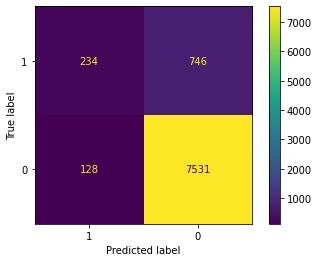

In [25]:
plot_confusion_matrix(
    model_ori_logis,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [26]:
print('Logistic Regression Report: \n',classification_report(ytest, y_pred_log_ori))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7659
           1       0.65      0.24      0.35       980

    accuracy                           0.90      8639
   macro avg       0.78      0.61      0.65      8639
weighted avg       0.88      0.90      0.88      8639



In [27]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_log_ori)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_log_ori, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_log_ori, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_log_ori, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_log_ori, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_log_ori, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_log_ori, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_log_ori)*100,2), '%')

Balanced-Acc :  61.1 %
Precision(+) :  64.64 %
Precision(-) :  90.99 %
Recall(+)    :  23.88 %
Recall(-)    :  98.33 %
F1 score(+)  :  34.87 %
F1 score(-)  :  94.52 %
Nilai ROC&AUC    :  61.1 %


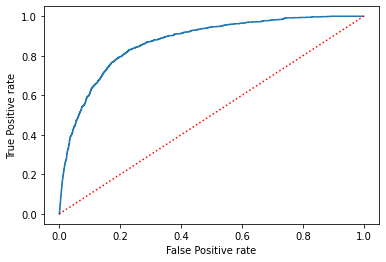

In [28]:
fpr_log, tpr_log, thres_log = roc_curve(ytest, model_ori_logis.predict_proba(xtest)[:,1])

plt.plot(fpr_log, tpr_log)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

#### Decision Tree Classifier

In [29]:
y_pred_tree_ori = model_ori_tree.predict(xtest)

In [30]:
confusion_matrix(ytest,y_pred_tree_ori,labels=[1,0])

array([[ 272,  708],
       [ 200, 7459]])

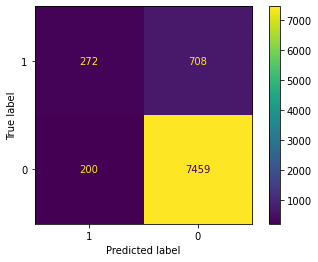

In [31]:
plot_confusion_matrix(
    model_ori_tree,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [32]:
print('Decision Tree Report: \n',classification_report(ytest, y_pred_tree_ori))

Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7659
           1       0.58      0.28      0.37       980

    accuracy                           0.89      8639
   macro avg       0.74      0.63      0.66      8639
weighted avg       0.88      0.89      0.88      8639



In [33]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_tree_ori)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_tree_ori, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_tree_ori, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_tree_ori, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_tree_ori, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_tree_ori, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_tree_ori, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_tree_ori)*100,2), '%')

Balanced-Acc :  62.57 %
Precision(+) :  57.63 %
Precision(-) :  91.33 %
Recall(+)    :  27.76 %
Recall(-)    :  97.39 %
F1 score(+)  :  37.47 %
F1 score(-)  :  94.26 %
Nilai ROC&AUC    :  62.57 %


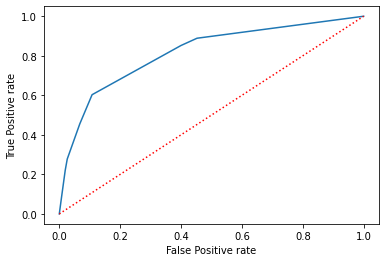

In [34]:
fpr_tree, tpr_tree, thres_tree = roc_curve(ytest, model_ori_tree.predict_proba(xtest)[:,1])

plt.plot(fpr_tree, tpr_tree)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

#### Random Forest Classifier

In [35]:
y_pred_rf_ori = model_ori_rf.predict(xtest)

In [36]:
confusion_matrix(ytest,y_pred_rf_ori,labels=[1,0])

array([[ 362,  618],
       [ 205, 7454]])

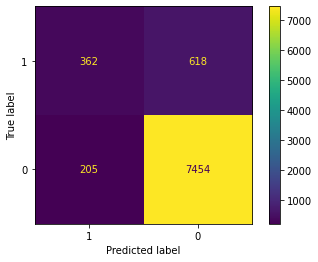

In [37]:
plot_confusion_matrix(
    model_ori_rf,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [38]:
print('Random Forest Report: \n',classification_report(ytest, y_pred_rf_ori))

Random Forest Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7659
           1       0.64      0.37      0.47       980

    accuracy                           0.90      8639
   macro avg       0.78      0.67      0.71      8639
weighted avg       0.89      0.90      0.89      8639



In [39]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_rf_ori)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_rf_ori, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_rf_ori, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_rf_ori, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_rf_ori, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_rf_ori, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_rf_ori, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_rf_ori)*100,2), '%')

Balanced-Acc :  67.13 %
Precision(+) :  63.84 %
Precision(-) :  92.34 %
Recall(+)    :  36.94 %
Recall(-)    :  97.32 %
F1 score(+)  :  46.8 %
F1 score(-)  :  94.77 %
Nilai ROC&AUC    :  67.13 %


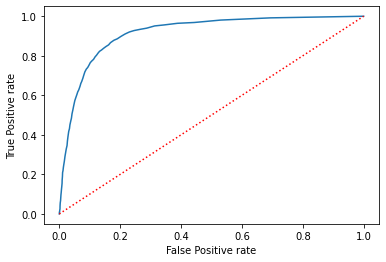

In [40]:
fpr_rf, tpr_rf, thres_rf = roc_curve(ytest, model_ori_rf.predict_proba(xtest)[:,1])

plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

### Logistic Regression Hyper Parameter Tuning

In [41]:
param_log = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01]}

In [42]:
modelrs_log= RandomizedSearchCV(
    estimator = LogisticRegression(), param_distributions = param_log, random_state=12
)

modelrs_log.fit(xtrain, ytrain)
modelrs_log.best_params_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}

In [43]:
model_baru_log = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 0.01)
model_baru_log.fit(xtrain, ytrain)

print(f'Logistic Regression tuning: {model_baru_log.score(xtest, ytest)}')

Logistic Regression tuning: 0.8969788169927075


### Decision Tree Hyper Parameter Tuning

In [44]:
param_tree = {"max_depth": [3, None], 
              "max_features": [random.randint(1, 9)], 
              "min_samples_leaf": [random.randint(1, 9)], 
              "criterion": ["gini", "entropy"]} 

In [45]:
modelrs_tree= RandomizedSearchCV(
    estimator = tree.DecisionTreeClassifier(), param_distributions = param_tree, random_state=40
)

modelrs_tree.fit(xtrain, ytrain)
modelrs_tree.best_params_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:277: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_leaf': 3, 'max_features': 9, 'max_depth': 3, 'criterion': 'gini'}

In [47]:
model_baru_tree = tree.DecisionTreeClassifier(min_samples_leaf= 3,
 max_features= 9,
 max_depth= 3,
 criterion= 'gini')
model_baru_tree.fit(xtrain, ytrain)

print(f'Decision Tree tuning: {model_baru_tree.score(xtest, ytest)}')

Decision Tree tuning: 0.8943164718138673


### Random Forest Hyper Parameter Tuning

In [48]:
param_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200]}

In [49]:
modelrs_rf= RandomizedSearchCV(
    estimator = RandomForestClassifier(), param_distributions = param_rf, random_state=101
)

modelrs_rf.fit(xtrain, ytrain)
modelrs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [50]:
model_baru_rf = RandomForestClassifier(n_estimators= 100,min_samples_split= 10,min_samples_leaf= 2,\
                                       max_features= 'sqrt',max_depth= 40,bootstrap= False)
model_baru_rf.fit(xtrain, ytrain)

# print(f'RandomForest asli  : {model_ori_rf.score(xtest, ytest)}')
print(f'RandomForest tuning: {model_baru_rf.score(xtest, ytest)}')

RandomForest tuning: 0.9061233939113323


In [51]:
#### Model Comparison with Cross validation

nilai_Logistik_Tuned = np.mean(cross_val_score(model_baru_log, xtest, ytest, cv=5, scoring='accuracy')) * 100 
nilai_Tree_Tuned = np.mean(cross_val_score(model_baru_tree, xtest, ytest, cv=5, scoring='accuracy')) * 100 
nilai_RandFor_Tuned = np.mean(cross_val_score(model_baru_rf, xtest, ytest, cv=5, scoring='accuracy')) * 100 
print(
    f'Logistic Regression score: {nilai_Logistik_Tuned}%\nDecision Tree score: {nilai_Tree_Tuned}%\nRandomForestClassifier score: {nilai_RandFor_Tuned}%'
)

Logistic Regression score: 89.61692294494841%
Decision Tree score: 88.99172188981106%
RandomForestClassifier score: 90.1494308799245%


## Evaluation Metrics

#### Logistic Regression

In [52]:
y_pred_log = model_baru_log.predict(xtest)

In [53]:
confusion_matrix(ytest,y_pred_log,labels=[1,0])

array([[ 217,  763],
       [ 127, 7532]])

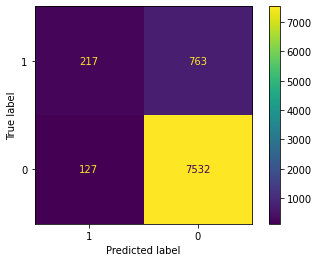

In [54]:
plot_confusion_matrix(
    model_baru_log,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [55]:
print('Logistic Regression Report: \n',classification_report(ytest, y_pred_log))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7659
           1       0.63      0.22      0.33       980

    accuracy                           0.90      8639
   macro avg       0.77      0.60      0.64      8639
weighted avg       0.88      0.90      0.87      8639



In [56]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_log)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_log)*100,2), '%')

Balanced-Acc :  60.24 %
Precision(+) :  63.08 %
Precision(-) :  90.8 %
Recall(+)    :  22.14 %
Recall(-)    :  98.34 %
F1 score(+)  :  32.78 %
F1 score(-)  :  94.42 %
Nilai ROC&AUC    :  60.24 %


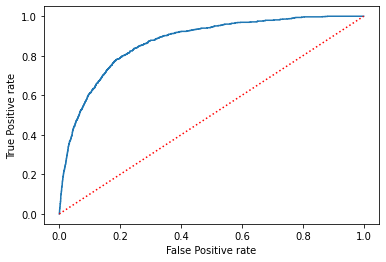

In [57]:
fpr_log, tpr_log, thres_log = roc_curve(ytest, model_baru_log.predict_proba(xtest)[:,1])

plt.plot(fpr_log, tpr_log)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

#### Decision Tree Classifier

In [58]:
y_pred_tree = model_baru_tree.predict(xtest)

In [59]:
confusion_matrix(ytest,y_pred_tree,labels=[1,0])

array([[ 216,  764],
       [ 149, 7510]])

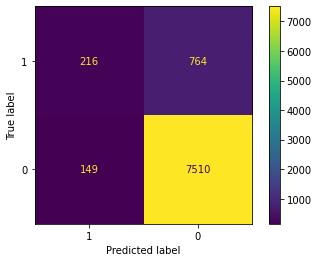

In [60]:
plot_confusion_matrix(
    model_baru_tree,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [61]:
print('Decision Tree Report: \n',classification_report(ytest, y_pred_tree))

Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7659
           1       0.59      0.22      0.32       980

    accuracy                           0.89      8639
   macro avg       0.75      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639



In [62]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_tree)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_tree)*100,2), '%')

Balanced-Acc :  60.05 %
Precision(+) :  59.18 %
Precision(-) :  90.77 %
Recall(+)    :  22.04 %
Recall(-)    :  98.05 %
F1 score(+)  :  32.12 %
F1 score(-)  :  94.27 %
Nilai ROC&AUC    :  60.05 %


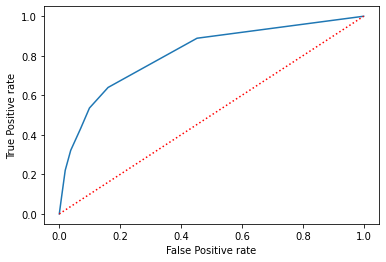

In [63]:
fpr_tree, tpr_tree, thres_tree = roc_curve(ytest, model_baru_tree.predict_proba(xtest)[:,1])

plt.plot(fpr_tree, tpr_tree)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

#### Random Forest Classifier

In [64]:
y_pred_rf = model_baru_rf.predict(xtest)

In [65]:
confusion_matrix(ytest,y_pred_rf,labels=[1,0])

array([[ 381,  599],
       [ 212, 7447]])

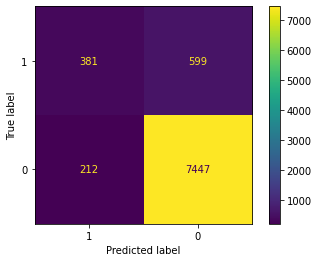

In [66]:
plot_confusion_matrix(
    model_baru_rf,xtest, ytest,values_format = '0.0f',labels=[1,0]
)

In [67]:
print('Random Forest Report: \n',classification_report(ytest, y_pred_rf))

Random Forest Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7659
           1       0.64      0.39      0.48       980

    accuracy                           0.91      8639
   macro avg       0.78      0.68      0.72      8639
weighted avg       0.89      0.91      0.90      8639



In [68]:
print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_rf)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_rf)*100,2), '%')

Balanced-Acc :  68.05 %
Precision(+) :  64.25 %
Precision(-) :  92.56 %
Recall(+)    :  38.88 %
Recall(-)    :  97.23 %
F1 score(+)  :  48.44 %
F1 score(-)  :  94.84 %
Nilai ROC&AUC    :  68.05 %


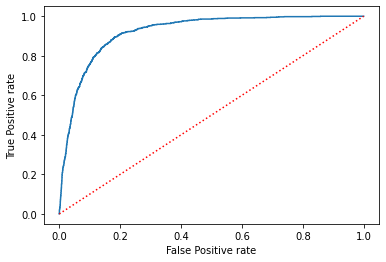

In [69]:
fpr_rf, tpr_rf, thres_rf = roc_curve(ytest, model_baru_rf.predict_proba(xtest)[:,1])

plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [70]:
df_compare = pd.DataFrame({
    'Model': ['Balanced_Accuracy','Precision (+)','Precision (-)','Recall (+)','Recall (-)', 'f1 Score(+)','f1 Score(-)',\
              'f0.5 Score(+)','f0.5 SCore(-)','Auc Score'],
    
    'Log_Def': [balanced_accuracy_score(ytest, y_pred_log_ori),
precision_score(ytest, y_pred_log_ori, pos_label=1),
precision_score(ytest, y_pred_log_ori, pos_label=0),
recall_score(ytest, y_pred_log_ori, pos_label=1),
recall_score(ytest, y_pred_log_ori, pos_label=0),
f1_score(ytest, y_pred_log_ori, pos_label=1),
f1_score(ytest, y_pred_log_ori, pos_label=0),
fbeta_score(ytest, y_pred_log_ori, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_log_ori, beta=0.5, pos_label=0), 
roc_auc_score(ytest, y_pred_log_ori)],
    
    'Log_Tuned': [balanced_accuracy_score(ytest, y_pred_log),
precision_score(ytest, y_pred_log, pos_label=1),
precision_score(ytest, y_pred_log, pos_label=0),
recall_score(ytest, y_pred_log, pos_label=1),
recall_score(ytest, y_pred_log, pos_label=0),
f1_score(ytest, y_pred_log, pos_label=1),
f1_score(ytest, y_pred_log, pos_label=0),
fbeta_score(ytest, y_pred_log, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_log, beta=0.5, pos_label=0),                  
roc_auc_score(ytest, y_pred_log)],
    
    'Tree_Def': [balanced_accuracy_score(ytest, y_pred_tree_ori),
precision_score(ytest, y_pred_tree_ori, pos_label=1),
precision_score(ytest, y_pred_tree_ori, pos_label=0),
recall_score(ytest, y_pred_tree_ori, pos_label=1),
recall_score(ytest, y_pred_tree_ori, pos_label=0),
f1_score(ytest, y_pred_tree_ori, pos_label=1),
f1_score(ytest, y_pred_tree_ori, pos_label=0),
fbeta_score(ytest, y_pred_tree_ori, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_tree_ori, beta=0.5, pos_label=0), 
roc_auc_score(ytest, y_pred_tree_ori)],
    
    'Tree_Tuned': [balanced_accuracy_score(ytest, y_pred_tree),
precision_score(ytest, y_pred_tree, pos_label=1),
precision_score(ytest, y_pred_tree, pos_label=0),
recall_score(ytest, y_pred_tree, pos_label=1),
recall_score(ytest, y_pred_tree, pos_label=0),
f1_score(ytest, y_pred_tree, pos_label=1),
f1_score(ytest, y_pred_tree, pos_label=0),
fbeta_score(ytest, y_pred_tree, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_tree, beta=0.5, pos_label=0), 
roc_auc_score(ytest, y_pred_tree)],
    
    'RandFor_Def': [balanced_accuracy_score(ytest, y_pred_rf_ori),
precision_score(ytest, y_pred_rf_ori, pos_label=1),
precision_score(ytest, y_pred_rf_ori, pos_label=0),
recall_score(ytest, y_pred_rf_ori, pos_label=1),
recall_score(ytest, y_pred_rf_ori, pos_label=0),
f1_score(ytest, y_pred_rf_ori, pos_label=1),
f1_score(ytest, y_pred_rf_ori, pos_label=0),
fbeta_score(ytest, y_pred_rf_ori, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_rf_ori, beta=0.5, pos_label=0), 
roc_auc_score(ytest, y_pred_rf_ori)],
    
    'RandFor_Tuned': [balanced_accuracy_score(ytest, y_pred_rf),
precision_score(ytest, y_pred_rf, pos_label=1),
precision_score(ytest, y_pred_rf, pos_label=0),
recall_score(ytest, y_pred_rf, pos_label=1),
recall_score(ytest, y_pred_rf, pos_label=0),
f1_score(ytest, y_pred_rf, pos_label=1),
f1_score(ytest, y_pred_rf, pos_label=0),
fbeta_score(ytest, y_pred_rf, beta=0.5, pos_label=1),
fbeta_score(ytest, y_pred_rf, beta=0.5, pos_label=0), 
roc_auc_score(ytest, y_pred_rf)]
    
})

df_compare

,Model,Log_Def,Log_Tuned,Tree_Def,Tree_Tuned,RandFor_Def,RandFor_Tuned
0,Balanced_Accuracy,0.611032,0.602423,0.625719,0.600477,0.671311,0.680548
1,Precision (+),0.646409,0.630814,0.576271,0.591781,0.638448,0.642496
2,Precision (-),0.909871,0.908017,0.913310,0.907663,0.923439,0.925553
3,Recall (+),0.238776,0.221429,0.277551,0.220408,0.369388,0.388776
4,Recall (-),0.983288,0.983418,0.973887,0.980546,0.973234,0.972320
5,f1 Score(+),0.348733,0.327795,0.374656,0.321190,0.468003,0.484425
6,f1 Score(-),0.945156,0.944215,0.942626,0.942698,0.947683,0.948360
7,f0.5 Score(+),0.481878,0.460526,0.474198,0.442623,0.557266,0.568317
8,f0.5 SCore(-),0.923664,0.922158,0.924815,0.921359,0.932986,0.934543
9,Auc Score,0.611032,0.602423,0.625719,0.600477,0.671311,0.680548


- Random Forest Model Tuned, secara keseluruhan memiliki performa yang tertinggi ketimbang model lainnya, oleh karena itu saya memilih model ini.

### Comparation Predicted and Actual Data on Dataset

In [71]:
# Cek Presentase dari keseluruhan dataset.

dfBanding = pd.DataFrame({
    'ytest': ytest,
    'Prediksi RF Tuned':y_pred_rf})

dfBanding

,ytest,Prediksi RF Tuned
4371,0,0
17977,0,0
12443,1,0
42110,1,1
8246,0,0
...,...,...
28043,0,0
18673,1,0
5840,0,0
36019,0,1


In [72]:
TruePred = len(dfBanding[dfBanding['ytest']==dfBanding['Prediksi RF Tuned']])

TruePred

7828

In [73]:
print(f'Presentase Prediksi Benar : {round((TruePred/len(dfBanding)*100),2)} %')

Presentase Prediksi Benar : 90.61 %


- Dari model yang dipilih, model dapat memprediksikan dengan benar dari data set yang ada sebesar 90.61% dan prediksi yang miss sebesar 9.39%.

## Feature Importance

In [74]:
# Feature Importance.

importances = model_baru_rf.feature_importances_

col_importances = list(zip(x.columns,importances))

In [75]:
col_importances = sorted(col_importances, key = lambda i: i[1], reverse=True)

In [76]:
col_importances

[('duration', 0.3884277533565052),
 ('month', 0.10726782666645217),
 ('day', 0.09884104690220205),
 ('balance', 0.09493324670612208),
 ('pdays_group', 0.048117854153312364),
 ('age_group', 0.047531955903254174),
 ('previous', 0.044250711328372355),
 ('job', 0.040811817626411055),
 ('housing', 0.04056088575245795),
 ('campaign', 0.033649019304559276),
 ('marital', 0.018928759735750977),
 ('education', 0.018058539375091203),
 ('loan', 0.0103495960011153),
 ('contact', 0.006904932117202091),
 ('default', 0.001366055071191812)]

## Joblib

In [77]:
joblib.dump(model_baru_rf, "model_LE", compress=True)

['model_LE']

In [78]:
joblib.dump(scaler.fit(df[['balance', 'day', 'duration', 'campaign','previous']]),'Scaler2')

['Scaler2']